# Does the rest of America realize that “The Empire Strikes Back” is clearly the best of the bunch?

FiveThirtyEight needed to collect data addressing this question. To do this, they surveyed Star Wars fans using the online tool SurveyMonkey. 
They received 835 total responses, which you download from their [GitHub repository](https://github.com/fivethirtyeight/data/tree/master/star-wars-survey).

For this project, you'll be cleaning and exploring the data set in Jupyter notebook. To see a sample notebook containing all of the answers, visit the [project's GitHub repository](https://github.com/dataquestio/solutions/blob/master/Mission201Solution.ipynb).

The following code will read the data into a pandas dataframe: 

In [437]:
import pandas as pd
url_raw = 'https://raw.githubusercontent.com/fivethirtyeight/data/master/star-wars-survey/StarWars.csv'
star_wars = pd.read_csv(url_raw,encoding="ISO-8859-1")

We need to specify an `encoding` because the data set has some characters that aren't in Python's default `utf-8` encoding. You can read more about character encodings on developer [Joel Spolsky's blog](http://www.joelonsoftware.com/articles/Unicode.html).

# Overview

In [438]:
print(star_wars.shape)
star_wars.head(5)

(1187, 38)


,RespondentID,Have you seen any of the 6 films in the Star Wars franchise?,Do you consider yourself to be a fan of the Star Wars film franchise?,Which of the following Star Wars films have you seen? Please select all that apply.,Unnamed: 4,Unnamed: 5,Unnamed: 6,Unnamed: 7,Unnamed: 8,Please rank the Star Wars films in order of preference with 1 being your favorite film in the franchise and 6 being your least favorite film.,...,Unnamed: 28,Which character shot first?,Are you familiar with the Expanded Universe?,Do you consider yourself to be a fan of the Expanded Universe?æ,Do you consider yourself to be a fan of the Star Trek franchise?,Gender,Age,Household Income,Education,Location (Census Region)
0,NaN,Response,Response,Star Wars: Episode I The Phantom Menace,Star Wars: Episode II Attack of the Clones,Star Wars: Episode III Revenge of the Sith,Star Wars: Episode IV A New Hope,Star Wars: Episode V The Empire Strikes Back,Star Wars: Episode VI Return of the Jedi,Star Wars: Episode I The Phantom Menace,...,Yoda,Response,Response,Response,Response,Response,Response,Response,Response,Response
1,3.292880e+09,Yes,Yes,Star Wars: Episode I The Phantom Menace,Star Wars: Episode II Attack of the Clones,Star Wars: Episode III Revenge of the Sith,Star Wars: Episode IV A New Hope,Star Wars: Episode V The Empire Strikes Back,Star Wars: Episode VI Return of the Jedi,3,...,Very favorably,I don't understand this question,Yes,No,No,Male,18-29,NaN,High school degree,South Atlantic
2,3.292880e+09,No,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,Yes,Male,18-29,"$0 - $24,999",Bachelor degree,West South Central
3,3.292765e+09,Yes,No,Star Wars: Episode I The Phantom Menace,Star Wars: Episode II Attack of the Clones,Star Wars: Episode III Revenge of the Sith,NaN,NaN,NaN,1,...,Unfamiliar (N/A),I don't understand this question,No,NaN,No,Male,18-29,"$0 - $24,999",High school degree,West North Central
4,3.292763e+09,Yes,Yes,Star Wars: Episode I The Phantom Menace,Star Wars: Episode II Attack of the Clones,Star Wars: Episode III Revenge of the Sith,Star Wars: Episode IV A New Hope,Star Wars: Episode V The Empire Strikes Back,Star Wars: Episode VI Return of the Jedi,5,...,Very favorably,I don't understand this question,No,NaN,Yes,Male,18-29,"$100,000 - $149,999",Some college or Associate degree,West North Central


### Fix 2nd row column headers

It looks like the first row `star_wars.iloc[0]` is not data row, instead, it's the 2nd row of the headers.

For some questions, the respondent had to check one or more boxes. The description of these check boxes are in the 2nd row of the header.

In [439]:
header_second_row = pd.DataFrame(star_wars.iloc[0]).reset_index()
header_second_row

,index,0
0,RespondentID,NaN
1,Have you seen any of the 6 films in the Star W...,Response
2,Do you consider yourself to be a fan of the St...,Response
3,Which of the following Star Wars films have yo...,Star Wars: Episode I The Phantom Menace
4,Unnamed: 4,Star Wars: Episode II Attack of the Clones
5,Unnamed: 5,Star Wars: Episode III Revenge of the Sith
6,Unnamed: 6,Star Wars: Episode IV A New Hope
7,Unnamed: 7,Star Wars: Episode V The Empire Strikes Back
8,Unnamed: 8,Star Wars: Episode VI Return of the Jedi
9,Please rank the Star Wars films in order of pr...,Star Wars: Episode I The Phantom Menace


In [440]:
movies_seen = header_second_row.iloc[3:9][0]
movies_seen

3        Star Wars: Episode I  The Phantom Menace
4     Star Wars: Episode II  Attack of the Clones
5     Star Wars: Episode III  Revenge of the Sith
6               Star Wars: Episode IV  A New Hope
7    Star Wars: Episode V The Empire Strikes Back
8        Star Wars: Episode VI Return of the Jedi
Name: 0, dtype: object

In [441]:
movies_for_ranking = header_second_row.iloc[9:15][0]
movies_for_ranking

9         Star Wars: Episode I  The Phantom Menace
10     Star Wars: Episode II  Attack of the Clones
11     Star Wars: Episode III  Revenge of the Sith
12               Star Wars: Episode IV  A New Hope
13    Star Wars: Episode V The Empire Strikes Back
14        Star Wars: Episode VI Return of the Jedi
Name: 0, dtype: object

In [442]:
characters = header_second_row.iloc[15:29][0]
characters

15                Han Solo
16          Luke Skywalker
17    Princess Leia Organa
18        Anakin Skywalker
19          Obi Wan Kenobi
20       Emperor Palpatine
21             Darth Vader
22        Lando Calrissian
23               Boba Fett
24                   C-3P0
25                   R2 D2
26           Jar Jar Binks
27           Padme Amidala
28                    Yoda
Name: 0, dtype: object

After extracting the information we need to work with columns concerning the question with checkbox, we can remove the invalid row with `RespondentID` as NaN.

In [443]:
star_wars = star_wars[star_wars['RespondentID'].notnull()]
star_wars

,RespondentID,Have you seen any of the 6 films in the Star Wars franchise?,Do you consider yourself to be a fan of the Star Wars film franchise?,Which of the following Star Wars films have you seen? Please select all that apply.,Unnamed: 4,Unnamed: 5,Unnamed: 6,Unnamed: 7,Unnamed: 8,Please rank the Star Wars films in order of preference with 1 being your favorite film in the franchise and 6 being your least favorite film.,...,Unnamed: 28,Which character shot first?,Are you familiar with the Expanded Universe?,Do you consider yourself to be a fan of the Expanded Universe?æ,Do you consider yourself to be a fan of the Star Trek franchise?,Gender,Age,Household Income,Education,Location (Census Region)
1,3.292880e+09,Yes,Yes,Star Wars: Episode I The Phantom Menace,Star Wars: Episode II Attack of the Clones,Star Wars: Episode III Revenge of the Sith,Star Wars: Episode IV A New Hope,Star Wars: Episode V The Empire Strikes Back,Star Wars: Episode VI Return of the Jedi,3,...,Very favorably,I don't understand this question,Yes,No,No,Male,18-29,NaN,High school degree,South Atlantic
2,3.292880e+09,No,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,Yes,Male,18-29,"$0 - $24,999",Bachelor degree,West South Central
3,3.292765e+09,Yes,No,Star Wars: Episode I The Phantom Menace,Star Wars: Episode II Attack of the Clones,Star Wars: Episode III Revenge of the Sith,NaN,NaN,NaN,1,...,Unfamiliar (N/A),I don't understand this question,No,NaN,No,Male,18-29,"$0 - $24,999",High school degree,West North Central
4,3.292763e+09,Yes,Yes,Star Wars: Episode I The Phantom Menace,Star Wars: Episode II Attack of the Clones,Star Wars: Episode III Revenge of the Sith,Star Wars: Episode IV A New Hope,Star Wars: Episode V The Empire Strikes Back,Star Wars: Episode VI Return of the Jedi,5,...,Very favorably,I don't understand this question,No,NaN,Yes,Male,18-29,"$100,000 - $149,999",Some college or Associate degree,West North Central
5,3.292731e+09,Yes,Yes,Star Wars: Episode I The Phantom Menace,Star Wars: Episode II Attack of the Clones,Star Wars: Episode III Revenge of the Sith,Star Wars: Episode IV A New Hope,Star Wars: Episode V The Empire Strikes Back,Star Wars: Episode VI Return of the Jedi,5,...,Somewhat favorably,Greedo,Yes,No,No,Male,18-29,"$100,000 - $149,999",Some college or Associate degree,West North Central
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1182,3.288389e+09,Yes,Yes,Star Wars: Episode I The Phantom Menace,Star Wars: Episode II Attack of the Clones,Star Wars: Episode III Revenge of the Sith,Star Wars: Episode IV A New Hope,Star Wars: Episode V The Empire Strikes Back,Star Wars: Episode VI Return of the Jedi,5,...,Very favorably,Han,No,NaN,Yes,Female,18-29,"$0 - $24,999",Some college or Associate degree,East North Central
1183,3.288379e+09,Yes,Yes,Star Wars: Episode I The Phantom Menace,Star Wars: Episode II Attack of the Clones,Star Wars: Episode III Revenge of the Sith,Star Wars: Episode IV A New Hope,Star Wars: Episode V The Empire Strikes Back,Star Wars: Episode VI Return of the Jedi,4,...,Very favorably,I don't understand this question,No,NaN,Yes,Female,30-44,"$50,000 - $99,999",Bachelor degree,Mountain
1184,3.288375e+09,No,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,No,Female,30-44,"$50,000 - $99,999",Bachelor degree,Middle Atlantic
1185,3.288373e+09,Yes,Yes,Star Wars: Episode I The Phantom Menace,Star Wars: Episode II Attack of the Clones,Star Wars: Episode III Revenge of the Sith,Star Wars: Episode IV A New Hope,Star Wars: Episode V The Empire Strikes Back,Star Wars: Episode VI Return of the Jedi,4,...,Very favorably,Han,No,NaN,Yes,Female,45-60,"$100,000 - $149,999",Some college or Associate degree,East North Central


# Cleaning and mapping `Yes`/`No` columns

In [444]:
cols = ['Have you seen any of the 6 films in the Star Wars franchise?', 
        'Do you consider yourself to be a fan of the Star Wars film franchise?']

star_wars[cols[0]].value_counts(dropna=False)

Yes    936
No     250
Name: Have you seen any of the 6 films in the Star Wars franchise?, dtype: int64

In [445]:
star_wars[cols[1]].value_counts(dropna=False)

Yes    552
NaN    350
No     284
Name: Do you consider yourself to be a fan of the Star Wars film franchise?, dtype: int64

In [446]:
yes_no = {'Yes': True, 'No': False}

for col in cols:
    star_wars[col] = star_wars[col].map(yes_no)
    print(star_wars[col].value_counts(dropna=False),'\n')

True     936
False    250
Name: Have you seen any of the 6 films in the Star Wars franchise?, dtype: int64 

True     552
NaN      350
False    284
Name: Do you consider yourself to be a fan of the Star Wars film franchise?, dtype: int64 



# Cleaning and mapping checkbox columns

The next six columns represent a single checkbox question. The respondent checked off a series of boxes in response to the question, `Which of the following Star Wars films have you seen? Please select all that apply`.

The columns for this question are:

- `Which of the following Star Wars films have you seen? Please select all that apply.` - Whether or not the respondent saw `Star Wars: Episode I The Phantom Menace`.
- `Unnamed: 4` - Whether or not the respondent saw `Star Wars: Episode II Attack of the Clones`.
- `Unnamed: 5` - Whether or not the respondent saw `Star Wars: Episode III Revenge of the Sith`.
- `Unnamed: 6` - Whether or not the respondent saw `Star Wars: Episode IV A New Hope`.
- `Unnamed: 7` - Whether or not the respondent saw `Star Wars: Episode V The Empire Strikes Back`.
- `Unnamed: 8` - Whether or not the respondent saw `Star Wars: Episode VI Return of the Jedi`.

For each of these columns, if the value in a cell is the name of the movie, that means the respondent saw the movie. If the value is `NaN`, the respondent either didn't answer or didn't see the movie. We'll assume that they didn't see the movie.

We'll need to **convert each of these columns to a Boolean, then rename the column something more intuitive**. We can convert the values the same way we did earlier, except that we'll need to include the movie title and `NaN` in the mapping dictionary.
- Rename each of the columns above so the names are more intuitive. We recommend using `seen_1` to indicate whether the respondent saw `Star Wars: Episode I The Phantom Menace`, `seen_2` for `Star Wars: Episode II Attack of the Clones`, and so on.

In [447]:
# print each movie names
movie_nums = [str(x+1) for x in range(6)]
movies_num_map = dict(zip(movie_nums, movies_seen))
movies_num_map

{'1': 'Star Wars: Episode I  The Phantom Menace',
 '2': 'Star Wars: Episode II  Attack of the Clones',
 '3': 'Star Wars: Episode III  Revenge of the Sith',
 '4': 'Star Wars: Episode IV  A New Hope',
 '5': 'Star Wars: Episode V The Empire Strikes Back',
 '6': 'Star Wars: Episode VI Return of the Jedi'}

In [448]:
# map to convert values to True or False
import numpy as np
for i in range(6):
    col = star_wars.columns[3:9][i]
    star_wars[col] = star_wars[col].map({movies[i]:True, np.NaN:False})

In [449]:
# rename the columns
cols = star_wars.columns[3:9]
colnames = ['seen_'+str(x+1) for x in range(6)]
name_map = dict(zip(cols, colnames))
star_wars =star_wars.rename(columns=name_map)

In [450]:
star_wars.columns[3:9]

Index(['seen_1', 'seen_2', 'seen_3', 'seen_4', 'seen_5', 'seen_6'], dtype='object')

In [451]:
star_wars[star_wars.columns[3:9]]

,seen_1,seen_2,seen_3,seen_4,seen_5,seen_6
1,True,True,True,True,True,True
2,False,False,False,False,False,False
3,True,True,True,False,False,False
4,True,True,True,True,True,True
5,True,True,True,True,True,True
...,...,...,...,...,...,...
1182,True,True,True,True,True,True
1183,True,True,True,True,True,True
1184,False,False,False,False,False,False
1185,True,True,True,True,True,True


# Cleaning the ranking columns

The next six columns ask the respondent to rank the Star Wars movies in order of least favorite to most favorite. `1` means the film was the most favorite, and `6` means it was the least favorite. Each of the following columns can contain the value `1`, `2`, `3`, `4`, `5`, `6`, or NaN:

- `Please rank the Star Wars films in order of preference with 1 being your favorite film in the franchise and 6 being your least favorite film.' - How much the respondent liked `Star Wars: Episode I The Phantom Menace`
- `Unnamed: 10` - How much the respondent liked `Star Wars: Episode II Attack of the Clones`
- `Unnamed: 11` - How much the respondent liked `Star Wars: Episode III Revenge of the Sith`
- `Unnamed: 12` - How much the respondent liked `Star Wars: Episode IV A New Hope`
- `Unnamed: 13` - How much the respondent liked `Star Wars: Episode V The Empire Strikes Back`
- `Unnamed: 14` - How much the respondent liked `Star Wars: Episode VI Return of the Jedi`

These columns don't require a lot of cleanup. We'll need to convert each column to a numeric type, though, then rename the columns so that we can tell what they represent more easily.

In [452]:
star_wars[star_wars.columns[9:15]]

,Please rank the Star Wars films in order of preference with 1 being your favorite film in the franchise and 6 being your least favorite film.,Unnamed: 10,Unnamed: 11,Unnamed: 12,Unnamed: 13,Unnamed: 14
1,3,2,1,4,5,6
2,NaN,NaN,NaN,NaN,NaN,NaN
3,1,2,3,4,5,6
4,5,6,1,2,4,3
5,5,4,6,2,1,3
...,...,...,...,...,...,...
1182,5,4,6,3,2,1
1183,4,5,6,2,3,1
1184,NaN,NaN,NaN,NaN,NaN,NaN
1185,4,3,6,5,2,1


In [453]:
star_wars[star_wars.columns[9:15][0]].value_counts()

4    237
6    168
3    130
1    129
5    100
2     71
Name: Please rank the Star Wars films in order of preference with 1 being your favorite film in the franchise and 6 being your least favorite film., dtype: int64

In [454]:
cols = star_wars.columns[9:15]
colnames = ['ranking_'+str(x+1) for x in range(6)]
name_map = dict(zip(cols, colnames))

star_wars =star_wars.rename(columns=name_map)
star_wars[star_wars.columns[9:15]] = star_wars[star_wars.columns[9:15]].astype(float)

In [455]:
star_wars[star_wars.columns[9:15]]

,ranking_1,ranking_2,ranking_3,ranking_4,ranking_5,ranking_6
1,3.0,2.0,1.0,4.0,5.0,6.0
2,NaN,NaN,NaN,NaN,NaN,NaN
3,1.0,2.0,3.0,4.0,5.0,6.0
4,5.0,6.0,1.0,2.0,4.0,3.0
5,5.0,4.0,6.0,2.0,1.0,3.0
...,...,...,...,...,...,...
1182,5.0,4.0,6.0,3.0,2.0,1.0
1183,4.0,5.0,6.0,2.0,3.0,1.0
1184,NaN,NaN,NaN,NaN,NaN,NaN
1185,4.0,3.0,6.0,5.0,2.0,1.0


# Finding the highest-ranked Movie

- Take the mean of the ranking columns using `pd.DataFrame.mean()`
- Make a bar chart of each ranking using `matplotlib` bar chart

In [456]:
ranking_means = star_wars[star_wars.columns[9:15]].mean()
ranking_means

ranking_1    3.732934
ranking_2    4.087321
ranking_3    4.341317
ranking_4    3.272727
ranking_5    2.513158
ranking_6    3.047847
dtype: float64

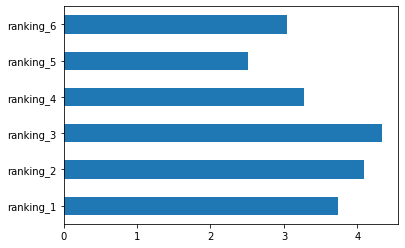

In [457]:
import matplotlib.pyplot as plt
%matplotlib inline

ranking_means.plot(kind='barh')

In [458]:
# The best ranked movie:
movies_num_map['5']

'Star Wars: Episode V The Empire Strikes Back'

# Finding the most viewed movie

In [459]:
views = star_wars[star_wars.columns[3:9]].sum()
views

seen_1    673
seen_2    571
seen_3    550
seen_4    607
seen_5    758
seen_6    738
dtype: int64

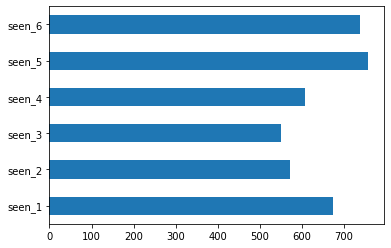

In [460]:
views.plot(kind='barh')

In [461]:
# the most viewed movie:
movies_num_map['5']

'Star Wars: Episode V The Empire Strikes Back'

# Exploring the data by segments

Now let's examine how certain segments of the survey population responded. There are several columns that segment our data into two groups. Here are a few examples:

- `Do you consider yourself to be a fan of the Star Wars film franchise?` - `True` or `False`
- `Do you consider yourself to be a fan of the Star Trek franchise?` - `Yes` or `No`
- `Gender` - `Male` or `Female`

We can split a dataframe into two groups based on a binary column by creating two subsets of that column, e.g. 

In [462]:
males = star_wars[star_wars['Gender']=='Male']
females = star_wars[star_wars['Gender']=='Female']

The subsets will allow us to compute the most viewed movie, the highest-ranked movie, and other statistics separately for each group.

### Most viewed movies

In [463]:
views_male = males[males.columns[3:9]].sum()
views_male

seen_1    361
seen_2    323
seen_3    317
seen_4    342
seen_5    392
seen_6    387
dtype: int64

In [464]:
views_female = females[females.columns[3:9]].sum()
views_female

seen_1    298
seen_2    237
seen_3    222
seen_4    255
seen_5    353
seen_6    338
dtype: int64

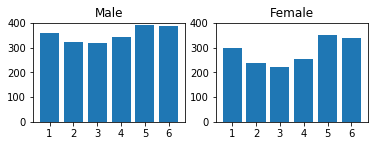

In [465]:
plt.figure()

plt.subplot(221)
plt.bar(movie_nums, views_male)
plt.ylim(0,400)
plt.title('Male')

plt.subplot(222)
plt.bar(movie_nums, views_female)
plt.ylim(0,400)
plt.title('Female')

plt.show()

### Highest ranked movie

In [466]:
ranking_male = males[males.columns[9:15]].mean()
ranking_male

ranking_1    4.037825
ranking_2    4.224586
ranking_3    4.274882
ranking_4    2.997636
ranking_5    2.458629
ranking_6    3.002364
dtype: float64

In [467]:
ranking_female = females[females.columns[9:15]].mean()
ranking_female

ranking_1    3.429293
ranking_2    3.954660
ranking_3    4.418136
ranking_4    3.544081
ranking_5    2.569270
ranking_6    3.078086
dtype: float64

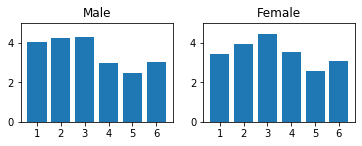

In [468]:
plt.figure()

plt.subplot(221)
plt.bar(movie_nums, ranking_male)
plt.ylim(0,5)
plt.title('Male')

plt.subplot(222)
plt.bar(movie_nums, ranking_female)
plt.ylim(0,5)
plt.title('Female')

plt.show()

### My observations

- Both male and female voted movie 5 `Star Wars: Episode V The Empire Strikes Back` as most-viewed and highest ranked. 

- Although it's observed there is more male viewer than female viewers for all star war movies.

- Also male viewers have almost the same ranking of movie 4 and movie 6, while female viewers prefer 6 over 4.



# Next steps

Here are some potential next steps:

- Try to segment the data based on columns like `Education`, `Location (Census Region)`, and `Which character shot first?`, which aren't binary. Are they any interesting patterns?


- Clean up columns `15` to `29`, which contain data on the characters respondents view favorably and unfavorably.
    - Which character do respondents like the most?
    - Which character do respondents dislike the most?
    - Which character is the most controversial (split between likes and dislikes)?

In [469]:
# save the star_war dataframe for next step analysis in another Jupyter notebook
%store star_wars

Stored 'star_wars' (DataFrame)


In [470]:
%store characters

Stored 'characters' (Series)


In [471]:
%store header_second_row

Stored 'header_second_row' (DataFrame)
